<a href="https://colab.research.google.com/github/henry8695/Henry-Woodward/blob/master/Coronavirus_Analysis_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CORONAVIRUS ANALYSIS**



# Setting up Environment

In [0]:
#Installing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Importing Files

In [0]:
#Importing COVID-19 file
from google.colab import files
upload = files.upload()

Saving time_series_covid_19_confirmed (1).csv to time_series_covid_19_confirmed (1).csv


In [0]:
#Importing population density file
from google.colab import files
upload = files.upload()

Saving population density.csv to population density.csv


In [0]:
#Importing population file
from google.colab import files
upload = files.upload()

Saving API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_821361.csv to API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_821361.csv


In [0]:
#Importing urban population file
from google.colab import files
upload = files.upload()

Saving API_SP.POP.TOTL_DS2_en_csv_v2_821007.csv to API_SP.POP.TOTL_DS2_en_csv_v2_821007.csv


In [0]:
#Importing temperature file
from google.colab import files
upload = files.upload()

Saving temperature.csv to temperature.csv


# Pre-processing COVID-19 Data

In [0]:
#Setting up dataframe
covid_19 = pd.read_csv("time_series_covid_19_confirmed (1).csv")
covid_19.head()

In [0]:
#Subsetting for mimumin cases
covid_19=covid_19[(covid_19["3/4/20"]>30)]
covid_19

In [0]:
#Renaming variables
covid_19.rename(columns={"Country/Region":"Country"}, inplace=True)
covid_19


In [0]:
#Taking out China and US
covid_19 = covid_19[covid_19.Country != "Mainland China"]
covid_19 = covid_19[covid_19.Country != "US"]
covid_19 = covid_19[covid_19.Country != "Others"]
covid_19 = covid_19[covid_19.Country != "Taipei and environs"]
covid_19

In [0]:
#Taking out unnecessary variables
covid_19.columns
covid_19=covid_19.drop(['Province/State','Lat', 'Long','1/22/20', '1/23/20','1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20','1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20','2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20','2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20','2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20','2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20','3/11/20'], axis=1)
covid_19

In [0]:
covid_19.columns

In [0]:
#Creating growth rate variable
covid_19['Growth Rate']=covid_19['3/10/20']/covid_19['3/4/20']
covid_19

#Importing and processing population density data

In [0]:
#Loading dataframe
density = pd.read_csv("population density.csv")
density.head

In [0]:
#Subsetting relevant variables
density=density.loc[:,["Country Name","2018"]]
density

In [0]:
#Changing variable names
density.columns=["Country","Population Density"]
density

In [0]:
#Inspection
density["Country"].unique()

In [0]:
#Removing Outliers
density=density[density["Population Density"] < 1000]
density

In [0]:
#Merging with covid_19
left=covid_19
right=density
covid_19=pd.merge(left, right, on="Country")
covid_19

# Importing and pre-processing population data

In [0]:
#Setting up dataframe
population = pd.read_csv("API_SP.POP.TOTL_DS2_en_csv_v2_821007.csv")
population.head

<bound method NDFrame.head of      Country Name Country Code     Indicator Name  ...        2017        2018  2019
0           Aruba          ABW  Population, total  ...    105366.0    105845.0   NaN
1     Afghanistan          AFG  Population, total  ...  36296400.0  37172386.0   NaN
2          Angola          AGO  Population, total  ...  29816748.0  30809762.0   NaN
3         Albania          ALB  Population, total  ...   2873457.0   2866376.0   NaN
4         Andorra          AND  Population, total  ...     77001.0     77006.0   NaN
..            ...          ...                ...  ...         ...         ...   ...
259        Kosovo          XKX  Population, total  ...   1830700.0   1845300.0   NaN
260   Yemen, Rep.          YEM  Population, total  ...  27834821.0  28498687.0   NaN
261  South Africa          ZAF  Population, total  ...  57000451.0  57779622.0   NaN
262        Zambia          ZMB  Population, total  ...  16853688.0  17351822.0   NaN
263      Zimbabwe          ZWE  Pop

In [0]:
#Subsetting relevant variables
population=population.loc[:,["Country Name","2018"]]
population

,Country Name,2018
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0
...,...,...
259,Kosovo,1845300.0
260,"Yemen, Rep.",28498687.0
261,South Africa,57779622.0
262,Zambia,17351822.0


In [0]:
#Changing variable names
population.columns=["Country","Population"]
population

,Country,Population
0,Aruba,105845.0
1,Afghanistan,37172386.0
2,Angola,30809762.0
3,Albania,2866376.0
4,Andorra,77006.0
...,...,...
259,Kosovo,1845300.0
260,"Yemen, Rep.",28498687.0
261,South Africa,57779622.0
262,Zambia,17351822.0


In [0]:
#Merging with covid_19
left=covid_19
right=population
covid_19=pd.merge(left, right, on="Country")
covid_19

,Country,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,Growth Rate,Population Density,Population
0,Thailand,43,43,43,47,48,50,50,50,53,1.232558,135.897207,69428524.0
1,Japan,274,293,331,360,420,461,502,511,581,1.755287,347.073458,126529100.0
2,France,191,204,285,377,653,949,1126,1209,1784,6.259649,122.338396,66987244.0
3,Malaysia,29,36,50,50,83,93,99,117,129,2.580000,95.962821,31528585.0
4,Germany,159,196,262,482,670,799,1040,1176,1457,5.561069,237.370970,82927922.0
5,Italy,2036,2502,3089,3858,4636,5883,7375,9172,10149,3.285529,205.450748,60431283.0
6,UK,40,51,85,115,163,206,273,321,382,4.494118,274.827392,66488991.0
7,Sweden,15,21,35,94,101,161,203,248,355,10.142857,25.001043,10183175.0
8,Spain,120,165,222,259,400,500,673,1073,1695,7.635135,93.529058,46723749.0
9,Iraq,26,32,35,35,40,54,60,60,71,2.028571,88.530570,38433600.0


# Pre-processing urban population dataset

In [0]:
#Setting up the dataframe
urban=pd.read_csv("API_SP.URB.TOTL.IN.ZS_DS2_en_csv_v2_821361.csv")
urban

In [0]:
#Subsetting relevant variables
urban=urban.loc[:,["Country Name","2018"]]
urban

In [0]:
#Changing variable names
urban.columns=["Country","Urban"]
urban

In [0]:
#Merging with covid_19
left=covid_19
right=urban
covid_19=pd.merge(left, right, on="Country")
covid_19

# Pre-processing temperature dataset

In [0]:
#Loading dataframe
temperature = pd.read_csv("temperature.csv")
temperature

In [0]:
#Subsetting relevant variables
temperature=temperature.loc[:,["Country","Temperature"]]
temperature

In [0]:
#Merging with covid-19
left=covid_19
right=temperature
covid_19=pd.merge(left, right, on="Country")
covid_19

# Basic Visualisations

In [0]:
covid_19

In [0]:
#Population density on growth rate scatterplot
covid_19.plot("Population Density", "Growth Rate", "scatter")

In [0]:
#Population on growth rate scatterplot
covid_19.plot("Population", "Growth Rate", "scatter")

In [0]:
#Urban population on growth rate
covid_19.plot("Urban", "Growth Rate", "scatter")

In [0]:
#Temperature on growth rate
covid_19.plot("Temperature", "Growth Rate", "scatter")

# Simple linear modelling

In [0]:
covid_19

In [0]:
#Population density on growth rate statistics
x=covid_19["Population Density"]
y=covid_19["Growth Rate"]
x=sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

In [0]:
#Population density on growth rate statistics
x=covid_19["Population Density"]
y=covid_19["Growth Rate"]
results = sm.OLS(y,sm.add_constant(x)).fit()
results.summary()

In [0]:
#Population on growth rate statistic
x1=covid_19["Population"]
y1=covid_19["Growth Rate"]
x1=sm.add_constant(x1)
model = sm.OLS(y1, x1).fit()
predictions = model.predict(x1)
model.summary()

In [0]:
#Urban on growth rate statistic
x2=covid_19["Urban"]
y2=covid_19["Growth Rate"]
model = sm.OLS(y2, x2).fit()
predictions = model.predict(x2)
model.summary()

In [0]:
x3=covid_19["Temperature"]
y3=covid_19["Growth Rate"]
x3=sm.add_constant(x3)
model = sm.OLS(y2, x3).fit()
predictions = model.predict(x3)
model.summary()

# Predicted vs Actual Growth Rate

In [0]:
covid_19

In [0]:
covid_19["Predicted Growth_Temperature"]=predictions

Text(0.5, 1.0, 'Country Performance in limiting Growth Rate')

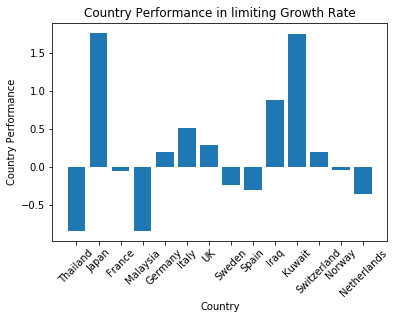

In [0]:
y=(covid_19["Predicted Growth_Temperature"]-(covid_19["Growth Rate"]))/covid_19["Growth Rate"]
x=covid_19["Country"]
plt.bar(x,y)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Country Performance', fontsize=10)
plt.xticks(x, fontsize=10, rotation=45)
plt.title('Country Performance in limiting Growth Rate')

In [0]:
covid_19.plot("Country", "Country Performance", 'bar')

In [0]:
covid_19.plot("Temperature", "Growth Rate", "scatter")
covid_19.plot("Temperature", "Predicted Growth_Temperature")

In [0]:
x=covid_19["Temperature"]
y=covid_19["Growth Rate"]
y_pred=covid_19["Predicted Growth_Temperature"]
plt.plot(x, y, "ko")
plt.plot(x, y_pred, "b")
plt.title("Predicted vs Actual Growth Rate - Temperature")
plt.xlabel("Temperature")
plt.ylabel("Growth Rate")

# Multiple Regression Modelling

In [0]:
#Urban on growth rate statistic
x3=covid_19[["Urban", "Population", "Population Density", "Temperature"]]
y3=covid_19["Growth Rate"]
x3=sm.add_constant(x3)
model = sm.OLS(y3, x3).fit()
predictions = model.predict(x3)
model.summary()